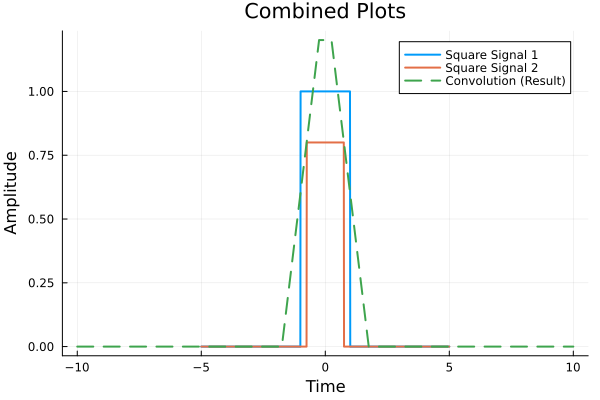

In [6]:
# Import the necessary libraries
using Plots
using DSP  # For convolution

# Define the square function
function square(t, A, τ)
    return A * (abs(t) <= (τ / 2) ? 1.0 : 0.0)
end


# Parameters for the triangular signals
A1 = 1.0       # Amplitude of the first square
τ1 = 2.0       # Width of the first square
A2 = 0.8       # Amplitude of the second square
τ2 = 1.5       # Width of the second square

# Define the time range
num_points=1000
t_range=(-5.0, 5.0)
t = range(t_range[1], stop=t_range[2], length=num_points) # Time axis for plotting

    
# Create the two square signals
square1 = [square(ti, A1, τ1) for ti in t]
square2 = [square(ti, A2, τ2) for ti in t]

# Perform the convolution using DSP.conv
Δt = t[2] - t[1]  # Sampling interval
convolution = conv(square1, square2) * Δt  # Adjust for the sampling interval

# Adjust the time range for the convolution
t_conv = range(2 * first(t), stop=2 * last(t), length=length(convolution))

# Plot the original signals
p1 = plot(t, square1, label="Square Signal 1", lw=2)
p2 = plot!(t, square2, label="Square Signal 2", lw=2)

# Plot the convolution result
p3 = plot!(t_conv, convolution,
      label="Convolution (Result)", linestyle=:dash, lw=2,
      xlabel="Time", ylabel="Amplitude",
      title="Convolution of Two Square Signals",
      legend=:true, grid=:true)


plot(p1, xlabel="Time", ylabel="Amplitude", title="Combined Plots", legend=:true, grid=:true)

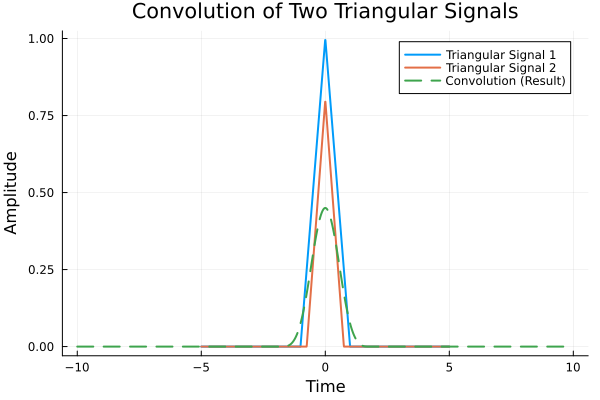

In [2]:
# Import the necessary libraries
using Plots
using DSP  # For convolution

# Define the triangular function
function triangular(t, A, τ)
    return A * max(1 - abs(t) / (τ / 2), 0.0)
end

# Parameters for the triangular signals
A1 = 1.0       # Amplitude of the first triangle
τ1 = 2.0       # Width of the first triangle
A2 = 0.8       # Amplitude of the second triangle
τ2 = 1.5       # Width of the second triangle

# Define the time range
t = range(-5, stop=5, length=1000)  # Time axis for plotting

# Create the two triangular signals
tri1 = [triangular(ti, A1, τ1) for ti in t]
tri2 = [triangular(ti, A2, τ2) for ti in t]

# Perform the convolution using DSP.convolve
Δt = t[2] - t[1]  # Sampling interval
convolution = conv(tri1, tri2) * Δt  # Adjust for the sampling interval

# Adjust the time range for the convolution
t_conv = range(2 * first(t), stop=2 * last(t), length=length(convolution))

# Plot the original signals
plot(t, tri1, label="Triangular Signal 1", lw=2)
plot!(t, tri2, label="Triangular Signal 2", lw=2)

# Plot the convolution result
plot!(t_conv, convolution
    , label="Convolution (Result)", linestyle=:dash, lw=2
    , xlabel = "Time", ylabel = "Amplitude"
    , title = "Convolution of Two Triangular Signals"
    , legend = :true, grid = :true
)

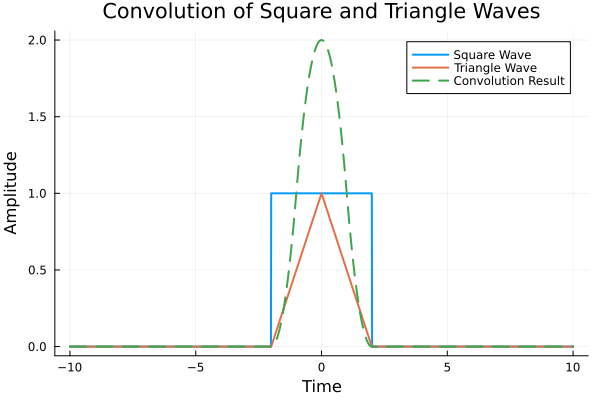

In [6]:
using Plots, DSP

# Define the square wave function
function square_wave(t; width=1.0, height=1.0)
    return (abs.(t) .<= width / 2) .* height
end

# Define the triangle wave function
function triangle_wave(t; width=1.0, height=1.0)
    return ((abs.(t) .<= width) .* (1 .- abs.(t) ./ width) .* height)
end

# Create time vectors
t = -10:0.01:10  # Time range for signals
dt = t[2] - t[1] # Time step

# Generate the square and triangle waves
square = square_wave.(t, width=4.0, height=1.0)
triangle = triangle_wave.(t, width=2.0, height=1.0)

# Perform the convolution
conv_result = conv(square, triangle) * dt
t_conv = range(minimum(t), stop=maximum(t), length=length(conv_result))

# Plot the signals
plot(t, square, label="Square Wave"
    , xlabel="Time", ylabel="Amplitude"
    , title="Convolution of Square and Triangle Waves"
    , lw = 2
)
plot!(t, triangle, label="Triangle Wave", lw = 2)
plot!(t_conv, conv_result, label="Convolution Result", legend=:topright, linestyle=:dash, lw=2)